In [18]:
from helpers import *
import tensorflow as tf

In [19]:
%matplotlib inline

In [18]:
patient, meta = all_slices(1)

Using most common size (256, 230). Remaining 16 images.
Using min length 30.


In [143]:
from skimage import segmentation, filters, measure, morphology, transform

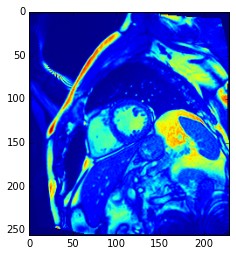

In [208]:
im = patient[7][0].pixel_array
plt.imshow(im)

In [224]:
from nnutils import *
train = np.load('netdata/standardized_train_3232.npy')
labels = np.load('netdata/labels_train.npy')

test = np.load('netdata/standardized_test_3232.npy')
test_labels = np.load('netdata/labels_test.npy')

batchdata, batchlabels = minibatch(train, labels, 10)
batchdata.shape

(10, 32, 32, 9)

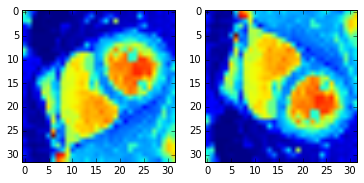

In [323]:
ims = batchdata[0,:,:,:]
plt.subplot(1,2,1)
plt.imshow(ims[:,:,1])
#new = transform.swirl(ims, strength=-0.4)
#new = transform.rotate(new, 30)
new = np.flipud(ims)
plt.subplot(1,2,2)
plt.imshow(new[:,:,1])

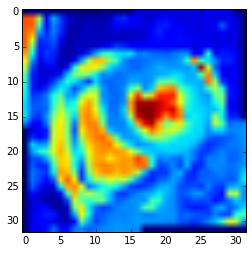

In [273]:
#plt.imshow(batchdata[1,:,:,4])
new = transform.swirl(batchdata[1,:,:,4], strength=0.3)
plt.imshow(new)

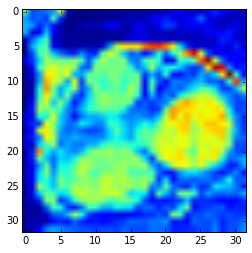

In [289]:
plt.imshow(batchdata[4,:,:,4])

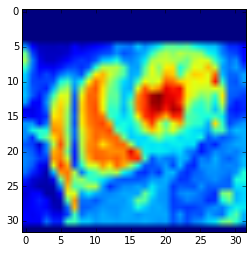

In [295]:
new = transform.swirl(batchdata[:,:,:,4], strength=0.3)
plt.imshow(new[0,:,:])

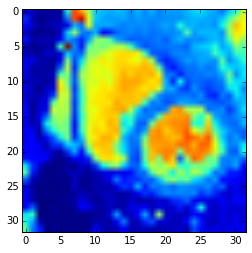

In [265]:
new = np.flipud(batchdata[0,:,:,4])
plt.imshow(new)

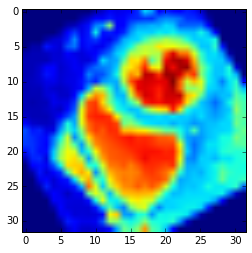

In [269]:
new = transform.rotate(batchdata[0,:,:,4], 30)
plt.imshow(new)

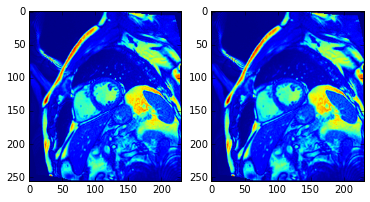

In [223]:
#new = transform.rotate(im, 25)
new = transform.swirl(im, strength=0.3)
#new = transform.rescale(im, 1.2)
#new = np.fliplr(im)
#new = np.flipud(im)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(new)

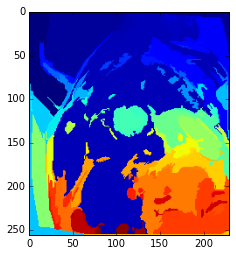

In [142]:
new = segmentation.felzenszwalb(im, 1, 0.5, 20)
#new = segmentation.clear_border(new)

plt.imshow(new)

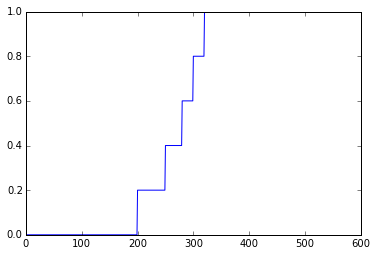

In [19]:
x = np.zeros(600)
x[200:250] = 0.2
x[250:280] = 0.4
x[280:300] = 0.6
x[300:320] = 0.8
x[320:] = 1
t = np.linspace(0,599, 600)
plt.plot(t,x)

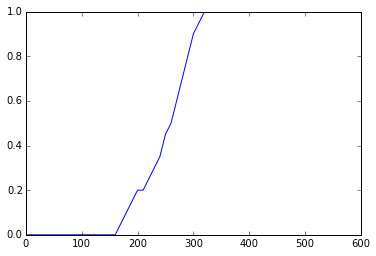

In [69]:
from scipy.signal import cspline1d, savgol_filter
h = np.ones(40)/40.
smoos = np.convolve(x,h, mode='same')
#coeffs = cspline1d(x)
#smoos = savgol_filter(x, 55, 10)
plt.plot(smoos)

In [70]:
len(smoos)

561

In [65]:
len(smoos[:-39])

600

In [66]:
crps(x, 300), crps(smoos[:-39], 300)

(0.024666666666666667, 0.018877083333333329)

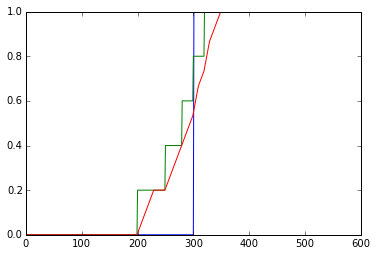

In [57]:
true_cdf = np.zeros(600)
true_cdf[t>300] = 1
plt.plot(true_cdf)
plt.plot(x)
plt.plot(smoos[:-29])

## Load the training and validation data

In [1]:
from nnutils import *
train = np.load('netdata/standardized_train.npy')
labels = np.load('netdata/labels_train.npy')

test = np.load('netdata/standardized_test.npy')
test_labels = np.load('netdata/labels_test.npy')

batchdata,batchlabels, _ = minibatch(train, labels)
testbatch, testlabels, _ = minibatch(test, test_labels, size=5000)
print batchlabels.shape

(500, 1)


In [5]:
[np.percentile(labels, 4*i) for i in range(1,25)]

[30.48,
 38.460000000000001,
 44.387999999999998,
 48.783999999999992,
 52.5,
 57.951999999999998,
 65.072000000000003,
 72.304000000000002,
 77.299999999999997,
 85.540000000000006,
 92.855999999999995,
 103.952,
 114.38400000000001,
 121.92000000000004,
 129.67999999999998,
 137.93600000000001,
 149.732,
 158.02799999999999,
 169.90000000000001,
 178.14000000000004,
 190.11599999999999,
 202.82400000000001,
 220.74799999999999,
 249.01599999999999]

In [6]:
def make_class_label(y):
    ''' Return an encoded version of y in one of 10 percentile classes '''
    y = np.array(y).astype(int)
    encodings = np.zeros((y.shape[0], 25))
    for i in range(y.shape[0]):
        if y[i] < 30.48:
            encodings[i, 0] = 1.
        elif y[i] < 38.46:
            encodings[i, 1] = 1.
        elif y[i] < 44.39:
            encodings[i, 2] = 1.
        elif y[i] < 48.78:
            encodings[i, 3] = 1.
        elif y[i] < 52.5:
            encodings[i, 4] = 1.
        elif y[i] < 57.95:
            encodings[i, 5] = 1.
        elif y[i] < 65.07:
            encodings[i, 6] = 1.
        elif y[i] < 72.3:
            encodings[i, 7] = 1.
        elif y[i] < 77.3:
            encodings[i, 8] = 1.
        elif y[i] < 85.54:
            encodings[i, 9] = 1.
        elif y[i] < 92.86:
            encodings[i, 10] = 1.
        elif y[i] < 103.952:
            encodings[i, 11] = 1.
        elif y[i] < 114.384:
            encodings[i, 12] = 1.
        elif y[i] < 121.92:
            encodings[i, 13] = 1.
        elif y[i] < 129.68:
            encodings[i, 14] = 1.
        elif y[i] < 137.94:
            encodings[i, 15] = 1.
        elif y[i] < 149.732:
            encodings[i, 16] = 1.
        elif y[i] < 158.03:
            encodings[i, 17] = 1.
        elif y[i] < 169.9:
            encodings[i, 18] = 1.
        elif y[i] < 178.14:
            encodings[i, 19] = 1.
        elif y[i] < 190.12:
            encodings[i, 20] = 1.
        elif y[i] < 202.824:
            encodings[i, 21] = 1.
        elif y[i] < 220.748:
            encodings[i, 22] = 1.
        elif y[i] < 249.016:
            encodings[i, 23] = 1.
        else:
             encodings[i, 24] = 1.

    return encodings

In [7]:
encs = make_class_label(labels)
encs.shape

(800, 25)

In [9]:
ls = np.argmax(encs, axis=1)

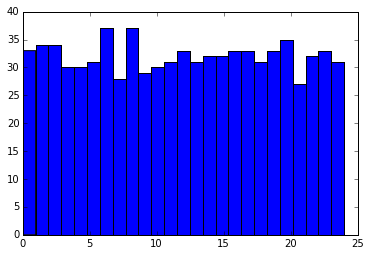

In [20]:
_,_,_ = plt.hist(ls, bins=25)

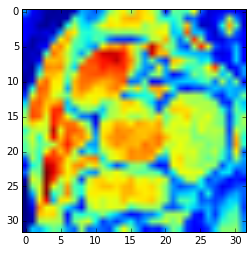

In [17]:
plt.imshow(batchdata[2,:,:,0])
#case = 1
#plt.imshow(batchdata[case,:,:,0])

# To Do: Map the labels to one-hot encodings of percentiles

In [7]:
from scipy.interpolate import interp1d

def encode_labels(labels, num_bins=64):
    '''Takes a label and encodes it into a CDF of length num_bins'''
    encodings = [np.floor(scipy.stats.percentileofscore(labels[:,0], label)*(num_bins/101.)) for label in labels]
    encodings = np.array(encodings).astype(int)
    cdfs = np.zeros((len(encodings), num_bins))
    for i, enc in enumerate(encodings):
        cdf = np.zeros(num_bins)
        cdf[enc:] = 1
        cdfs[i,:] = cdf      
        
    return cdfs

def decode_cdfs(cdfs, original_labels, num_bins=64):
    '''Convert a percentile CDF to a 600 point CDF'''
    ### Get the percentiles
    percs = []
    for i in range(num_bins):
        percs.append(np.percentile(original_labels, (100./num_bins)*i))
    percs = np.array(percs).astype(int)
    
    out_cdfs = np.zeros((len(original_labels), 600))
    ### Interpolate 
    for i,cdf in enumerate(cdfs):
        f = interp1d(percs, cdf, kind='linear', assume_sorted=True)
        out_cdf = np.zeros(600)

        x_new = np.linspace(percs.min(), percs.max(), percs.max()-percs.min())
        out_cdf[percs.min():percs.max()] = f(x_new)
        out_cdf[percs.max():] = 1
        out_cdfs[i,:] = out_cdf
    
    return out_cdfs

In [31]:
#batchlabels has shape (500,)
true_cdfs = make_cdf(testlabels)

label_cdfs = encode_labels(testlabels, num_bins=600)
# label_cdfs should have shape (500,num_bins)
cdfs = decode_cdfs(label_cdfs, testlabels, num_bins=600)
# cdfs should have shape (500, 600)

In [32]:
cdfs.shape

(5000, 600)

In [33]:
pests = np.argmax(label_cdfs, axis=1)
old_pests = np.argmax(true_cdfs, axis=1)
pests.shape

(5000,)

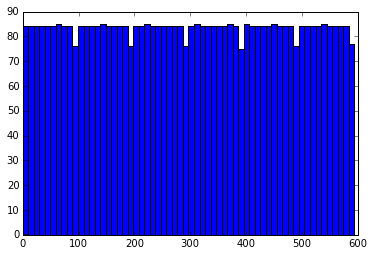

In [34]:
_,_,_ = plt.hist(pests, bins=60)

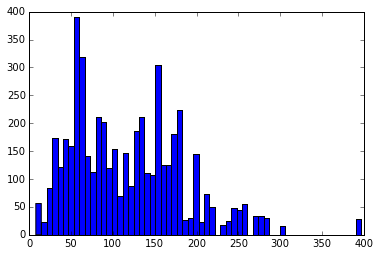

In [35]:
_,_,_ = plt.hist(old_pests, bins=60)

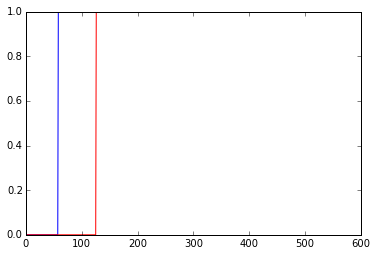

In [38]:
plt.plot(true_cdfs[300])
plt.plot(label_cdfs[300], 'r')

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [26]:
train_labels = np.genfromtxt(root_train+'.csv', delimiter=",")
train_labels = train_labels[1:,1:]
train_labels.shape

(500, 2)

In [27]:
train_labels = train_labels.reshape(1000,1)

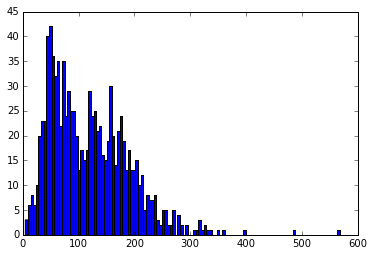

In [28]:
counts, limits, _ = plt.hist(train_labels, bins=120)

### The plot below shows where the separations would be between classes if we use a percentile as the label. The vertical lines are lower bounds for each class (i.e. the leftmost vertical line is the 0th percentile)

<Container object of 3 artists>

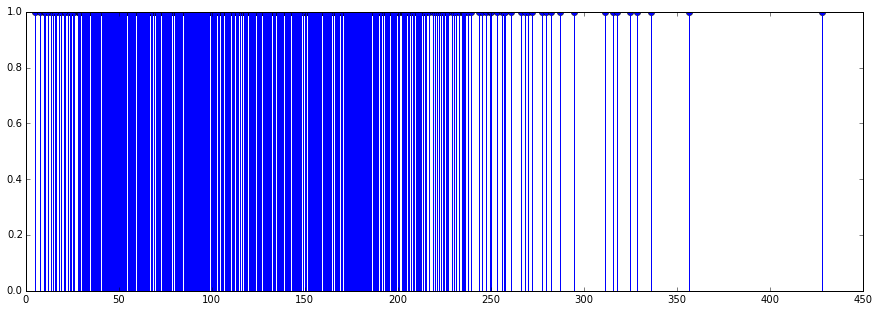

In [29]:
percs = []
num_bins = 600
for i in range(num_bins):
    percs.append(np.percentile(train_labels, (100./num_bins)*i))

plt.figure(figsize=(15,5))
plt.stem(percs, np.ones(num_bins))

In [67]:
percs = []
num_bins = 64
for i in range(num_bins):
    percs.append(np.percentile(train_labels, (100./num_bins)*i))
#first precision
precisions = [percs[1]/4.]
#everything in the middle
precisions += [((percs[i+1] - percs[i-1])/2.)/2. for i in range(1,num_bins-1)]
#last precision
precisions += [(600 - percs[-2])/4.]
precisions = np.array(precisions)
even = 300./num_bins

print 'Even spacing precision = %f' % even
print 'Average precision = %f' % precisions.mean()
print 'Minimum precision = %f' % precisions.min()
print 'Maximum precision = %f' % precisions.max()

Even spacing precision = 4.687500
Average precision = 3.472601
Minimum precision = 0.750000
Maximum precision = 85.412500


# Convolutional Net Model

## Building a Convolutional Net

### Useful helper functions for building the net

In [3]:
def cumsum(softmax):
    values = tf.split(1, softmax.get_shape()[1], softmax)
    out = []
    prev = tf.zeros_like(values[1])
    for val in values:
        s = prev + val
        out.append(s)
        prev = s
    csum = tf.concat(1, out)
    return csum

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1) #Random noise for symmetry breaking
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME') #Stride of 1

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #2x2 max pooling, stride = 2

### This net is currently using a straightforward architecture similar to LeNet. 
The architecture being used is: Input -> Conv1 -> MaxPool -> Conv2 -> MaxPool -> HiddenLayer -> SoftMax

In [9]:
### Architectural Hyperparameters
DEPTH_1 = 20         # The output depth of the first convolutional layer
DEPTH_2 = 40         # The output depth of the second convolutional layer
DEPTH_3 = 80         # The output depth of the second convolutional layer
DEPTH_4 = 150        # The output depth of the second convolutional layer
DEPTH_5 = 150        # The output depth of the second convolutional layer
NUM_HIDDEN = 400     # Number of hidden units in the hidden layer
NUM_INPUTS = 9       # Number of input channels
NUM_OUTPUTS = 600    # Number of output classes in the softmax layer
KERNEL_X = 3         # The width of the convolution kernel (using same for 1st and 2nd layers)
KERNEL_Y = 3         # The height of the convolution kernel (using same for 1st and 2nd layers)

mu = 0.0001

### Construct the ConvNet graph

In [10]:
graph = tf.Graph()
with graph.as_default():
    ####################################### INPUT/OUTPUT PLACEHOLDERS ##############################################
    x = tf.placeholder(tf.float32, shape=[None, 32, 32, NUM_INPUTS]) #Placeholder for the input images
    y_ = tf.placeholder(tf.float32, shape=[None, NUM_OUTPUTS]) #Placeholder for the label cdfs

    ####################################### FIRST CONVOLUTIONAL LAYER ##############################################
    # The weight tensor has dimensions [kernel_size_x, kernel_size_y, num_input_channels, num_output_channels]
    W_conv1 = weight_variable([KERNEL_X, KERNEL_Y, NUM_INPUTS, DEPTH_1])
    b_conv1 = bias_variable([DEPTH_1])
    #Take the input image, reshape it to a 4D tensor with dimensions: [_, image_width, image_height, num_channels]
    #x_image = tf.reshape(x, [-1,32,32,3])
    # Convolve with kernel -> add bias -> apply ReLU -> max pool 
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    ####################################### SECOND CONVOLUTIONAL LAYER ##############################################
    W_conv2 = weight_variable([KERNEL_X, KERNEL_Y, DEPTH_1, DEPTH_2])
    b_conv2 = bias_variable([DEPTH_2])

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    ####################################### THIRD CONVOLUTIONAL LAYER ##############################################
    W_conv3 = weight_variable([KERNEL_X, KERNEL_Y, DEPTH_2, DEPTH_3])
    b_conv3 = bias_variable([DEPTH_3])

    h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
    h_pool3 = max_pool_2x2(h_conv3)
    
    ####################################### FOURTH CONVOLUTIONAL LAYER ##############################################
    W_conv4 = weight_variable([KERNEL_X, KERNEL_Y, DEPTH_3, DEPTH_4])
    b_conv4 = bias_variable([DEPTH_4])

    h_conv4 = tf.nn.relu(conv2d(h_pool3, W_conv4) + b_conv4)
    h_pool4 = max_pool_2x2(h_conv4)
    #h_pool4 = tf.nn.avg_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    #h_pool5_flat = tf.reshape(h_pool5, [-1, DEPTH_5])
    ####################################### FIFTH CONVOLUTIONAL LAYER ##############################################
    #This layer uses a 1x1 convolution
    W_conv5 = weight_variable([1, 1, DEPTH_4, DEPTH_5])
    b_conv5 = bias_variable([DEPTH_5])

    h_conv5 = tf.nn.relu(conv2d(h_pool4, W_conv5) + b_conv5)
    h_pool5 = tf.nn.avg_pool(h_conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    h_pool5_flat = tf.reshape(h_pool5, [-1, DEPTH_5])
    #################################### FULLY-CONNECTED FEEDFORWARD LAYER ###########################################
    ## Using 8*24 here because after 2 max pools, the input dimensions have both decreased by a factor of 4
    #W_fc1 = weight_variable([4 * 4 * DEPTH_3, NUM_HIDDEN])
    #b_fc1 = bias_variable([NUM_HIDDEN])

    #h_pool3_flat = tf.reshape(h_pool3, [-1, 4*4*DEPTH_3])
    #h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)

    ############################################### DROPOUT ##########################################################
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_pool5_flat, keep_prob)

    ############################################# SOFTMAX OUTPUT LAYER ###############################################
    #W_fc2 = weight_variable([NUM_HIDDEN, NUM_OUTPUTS])
    W_fc2 = weight_variable([DEPTH_5, NUM_OUTPUTS])
    b_fc2 = bias_variable([NUM_OUTPUTS])

    y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

    #Cumulative sum
    y = cumsum(y_conv)
    ##################################### SETTING UP THE OPTIMISATION PROBLEM #####################################
    crps = tf.reduce_mean(tf.square(y - y_)) #y_ here should be the label cdfs
    ### Could add learning rate decay here - 1e-4 is the current learning rate
    loss = crps + mu*(tf.nn.l2_loss(W_conv1) + tf.nn.l2_loss(W_conv2) + tf.nn.l2_loss(W_conv3)
                        + tf.nn.l2_loss(W_conv4) + tf.nn.l2_loss(W_conv5) + tf.nn.l2_loss(W_fc2))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

## Train and evaluate the model

In [11]:
from nnutils import *
train = np.load('netdata/standardized_train_3232.npy')
labels = np.load('netdata/labels_train.npy')

test = np.load('netdata/standardized_test_3232.npy')
test_labels = np.load('netdata/labels_test.npy')

In [12]:
train.shape, labels.shape, test.shape, test_labels.shape

((3, 770, 2, 8, 32, 32), (770,), (3, 194, 2, 8, 32, 32), (194,))

In [13]:
batchdata, batchlabels = minibatch(train, labels, size=100)
batchdata.shape
#label_cdfs = make_cdf(batchlabels)
#label_cdfs.shape

(100, 32, 32, 9)

In [17]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.initialize_all_variables())
    ######################################### Change this to our dataset ###########################################
    for i in range(10000):
        batchdata, batchlabels = minibatch(train, labels, size=100)
        label_cdfs = make_cdf(batchlabels)
        if i%50 == 0:
            train_accuracy = crps.eval(feed_dict={
                x:batchdata, y_: label_cdfs, keep_prob: 1.0})
            print("step %d, training CRPS %g"%(i, train_accuracy))
        
        if i%400 == 0:
            testbatch, testlabels = minibatch(test, test_labels, size=3000)
            test_cdfs = make_cdf(testlabels)
            test_accuracy = crps.eval(feed_dict={
                x: testbatch, y_: test_cdfs, keep_prob: 1.0}) #keep_prob is for dropout
            print("step %d, test CRPS %g"% (i, test_accuracy))
            
        train_step.run(feed_dict={x: batchdata, y_: label_cdfs, keep_prob: 0.5}) 
            
    batchdata, batchlabels = minibatch(train, labels, size=3000)
    label_cdfs = make_cdf(batchlabels)
    print("training CRPS %g"%crps.eval(feed_dict={
        x: batchdata, y_: label_cdfs, keep_prob: 1.0}))
    
    testbatch, testlabels = minibatch(test, test_labels, size=8000)
    test_cdfs = make_cdf(testlabels)
    print("test CRPS %g"%crps.eval(feed_dict={
        x: testbatch, y_: test_cdfs, keep_prob: 1.0}))

step 0, training CRPS 0.197656
step 0, test CRPS 0.205055
step 50, training CRPS 0.0761677
step 100, training CRPS 0.06814
step 150, training CRPS 0.0710962
step 200, training CRPS 0.0654053
step 250, training CRPS 0.0617596
step 300, training CRPS 0.0690371
step 350, training CRPS 0.0534263
step 400, training CRPS 0.0498849
step 400, test CRPS 0.0603372
step 450, training CRPS 0.0509526
step 500, training CRPS 0.048986
step 550, training CRPS 0.047731
step 600, training CRPS 0.0492495
step 650, training CRPS 0.0510415
step 700, training CRPS 0.0417754
step 750, training CRPS 0.0381038
step 800, training CRPS 0.0414343
step 800, test CRPS 0.0487504
step 850, training CRPS 0.0430805
step 900, training CRPS 0.0372515
step 950, training CRPS 0.0376259
step 1000, training CRPS 0.0339861
step 1050, training CRPS 0.0367241
step 1100, training CRPS 0.03252
step 1150, training CRPS 0.0319625
step 1200, training CRPS 0.0329023
step 1200, test CRPS 0.0396952
step 1250, training CRPS 0.0330006
st

## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [4]:
from convnet_experiment import *

In [5]:
from nnutils import *
train = np.load('netdata/standardized_train.npy')
labels = np.load('netdata/labels_train.npy')

test = np.load('netdata/standardized_test.npy')
test_labels = np.load('netdata/labels_test.npy')

train.shape, labels.shape, test.shape, test_labels.shape

((3, 800, 2, 8, 32, 32), (800,), (3, 200, 2, 8, 32, 32), (200,))

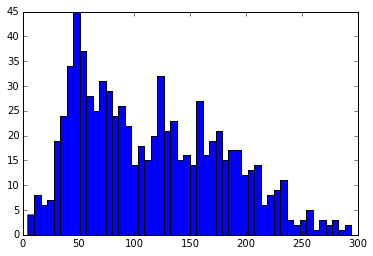

In [10]:
_,_,_ = plt.hist(labels[labels<300], bins=50)

In [15]:
new_lab = labels[labels<300]*2.
np.sum(new_lab>300)

242

In [69]:
np.sum(labels>360)

2

array([ 12.,  13.,  14.,   6.,   8.,   9.,  11.,   3.,   2.,   3.,   5.,
         1.,   3.,   2.,   3.,   1.,   2.])

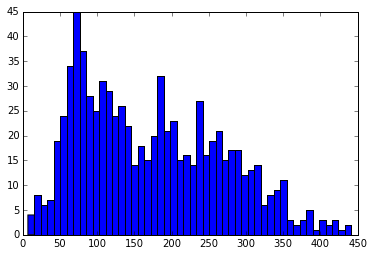

In [135]:
counts,_,_ = plt.hist(labels[labels<300]*1.5, bins=50)
counts[-17:]

## Create an artificial large set

### Take only examples with volume <= 300 and add random enlargement from [1, 2] on that set during training

In [96]:
sorted(labels)[-14:]

[294.5,
 314.39999999999998,
 315.39999999999998,
 315.80000000000001,
 317.89999999999998,
 323.10000000000002,
 325.30000000000001,
 327.60000000000002,
 331.10000000000002,
 336.19999999999999,
 350.10000000000002,
 359.5,
 488.60000000000002,
 568.60000000000002]

In [45]:
batchdata, batchlabel, _ = minibatch(train, labels, 2)
batchdata.shape, batchlabel.shape

((2, 32, 32, 9), (2, 1))

In [41]:
def enlarge(dat, labels):
    '''Enlarges a minibatch'''
    ## Scale at the top will be relative to the *area*
    num_cases = np.shape(dat)[0]
    for i in range(num_cases):
        scale = get_random_in_range(1.,2.)
        # Change the label
        labels[i] *= scale
        # Get scale adjustment for each axis
        scale = np.sqrt(scale)
        #Readjust the shape of the resized image
        new_shape = np.array(np.shape(dat[i])).astype(float)
        new_shape[:2] *= scale #Rescale the image dimensions, but not the depth
        new_shape = new_shape.astype(int)       
        new = transform.resize(dat[i], new_shape)
        bound = int((scale-1)*16)
        dat[i] = new[bound:bound+32, bound:bound+32]

    return dat, labels

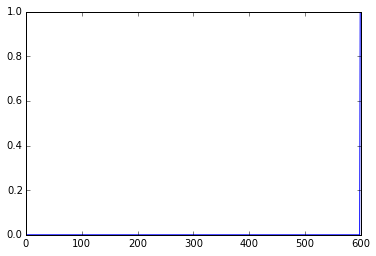

In [65]:
plt.plot(make_cdf([599])[0])

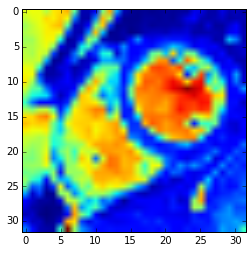

In [56]:
batchdata, batchlabel, _ = minibatch(train, labels, 100)
plt.imshow(batchdata[0,:,:,1])

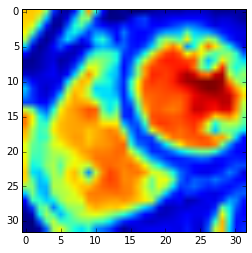

In [57]:
enlarged_batch, enlarged_labels = enlarge(batchdata, batchlabel)
plt.imshow(batchdata[0,:,:,1])

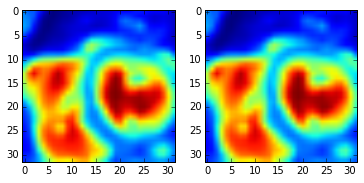

In [44]:
i = 1
plt.subplot(1,2,1)
plt.imshow(batchdata[0,:,:,i])
plt.subplot(1,2,2)
plt.imshow(enlarged_batch[0,:,:,i])

In [36]:
enlarged_labels

array([[ 300.41375052],
       [ 177.66222843]])

In [194]:
from skimage import transform
def enlarge(case, scale):
    ''''''
    ## Scale at the top will be relative to the *area*
    scale = np.sqrt(scale)
    new_shape = np.array(case.shape).astype(float)
    new_shape[:2] *= scale
    new_shape = new_shape.astype(int)
    
    new = transform.resize(case, new_shape)
    bound = int((scale-1)*16)
    return new[bound:bound+32, bound:bound+32]

In [184]:
batchdata[0].shape, new.shape

((32, 32, 9), (32, 32, 9))

In [193]:
scale = 1.6
batchlabel[0], scale*batchlabel[0]

(array([ 156.99999875]), array([ 251.19999799]))

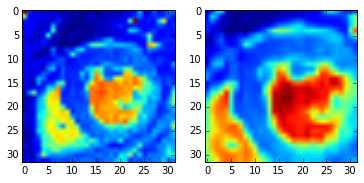

In [200]:
i = 4
new = enlarge(batchdata[0], 2)
plt.subplot(1,2,1)
plt.imshow(batchdata[0,:,:,i])
plt.subplot(1,2,2)
plt.imshow(new[:,:,i])

In [165]:
from skimage import transform
scale = 1.4
im = batchdata[0,:,:]#batchdata[0,:,:,1]
new_shape = np.array(im.shape).astype(float)
new_shape[:2] *= scale
new_shape = new_shape.astype(int)
new = transform.resize(im, new_shape)
bound = int((scale-1)*16)
new = new[bound:bound+32, bound:bound+32]

In [167]:
im.shape, new.shape

((32, 32, 9), (32, 32, 9))

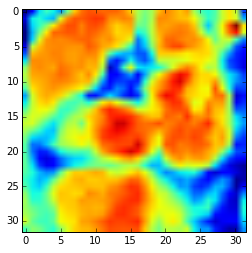

In [178]:
plt.imshow(new[:,:,0])

In [158]:
batchdata.shape, new.shape

((2, 32, 32, 9), (32, 32, 12))

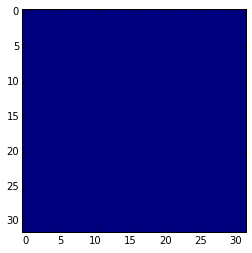

In [156]:
plt.imshow(new[:,:,0])

(array([ 156.99999875]), array([ 292.01644482]))

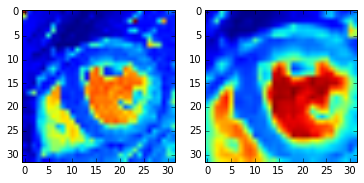

In [125]:
plt.subplot(1,2,1)
plt.imshow(batchdata[0,:,:,1])
plt.subplot(1,2,2)
scale = get_random_in_range(1.,1.4)
plt.imshow(enlarge(batchdata[0,:,:,1], scale))
batchlabel[0], batchlabel[0]*scale**2

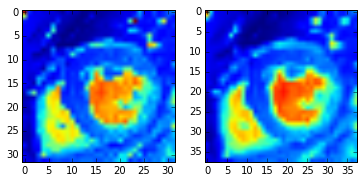

In [29]:
plt.subplot(1,2,1)
plt.imshow(batchdata[0,:,:,4])
plt.subplot(1,2,2)
plt.imshow(scipy.misc.imresize(batchdata[0,:,:,4], 1.2))

In [15]:
((test_labels>240).sum())/float(len(test_labels))

0.059999999999999998

In [16]:
((labels>240).sum())/float(len(labels))

0.043749999999999997

In [3]:
RUN_NAME = 'CRPS-MODEL-3.0'
DATA_DIR = 'netdata'
ITERS = 100000
START_ITER = 0
MODEL_LOAD_PATH = None
PIC_WIDTH = 32
### Architectural Hyperparameters
DEPTH_1 = 20         # The output depth of the first convolutional layer
DEPTH_2 = 40         # The output depth of the second convolutional layer
DEPTH_3 = 80         # The output depth of the second convolutional layer
DEPTH_4 = 150        # The output depth of the second convolutional layer
DEPTH_5 = 150        # The output depth of the second convolutional layer
DEPTH_6 = 150        # The output depth of the second convolutional layer
NUM_HIDDEN = 400     # Number of hidden units in the hidden layer
NUM_OUTPUTS = 600    # Number of output classes in the softmax layer
KERNEL_X = 3         # The width of the convolution kernel (using same for 1st and 2nd layers)
KERNEL_Y = 3         # The height of the convolution kernel (using same for 1st and 2nd layers)
mu = 0.0001
LEARNING_RATE = 1e-4

REGULARIZE_BIAS = False


NUM_INPUTS = 3       # Number of input channels
NUM_REPS = 64

TRAIN_LABEL_NOISE_STD = 2.
TRAIN_LABEL_SMOOTHING_STD = 0.
DATA_AUGMENTATION = False

DATA_MEDIAN_FILTER = False

NUM_INPUTS = 9       # Number of input channels
NUM_REPS = 144
TRAIN_LABEL_NOISE_STD = .05
TRAIN_LABEL_SMOOTHING_STD = .02
RUN_NAME = 'REL-NOISE'

graph = tf.Graph()
with graph.as_default():
    ####################################### INPUT/OUTPUT PLACEHOLDERS ##############################################
    x = tf.placeholder(tf.float32, shape=[None, PIC_WIDTH, PIC_WIDTH, NUM_INPUTS]) #Placeholder for the input images
    y_ = tf.placeholder(tf.float32, shape=[None, NUM_OUTPUTS]) #Placeholder for the label cdfs

    ####################################### FIRST CONVOLUTIONAL LAYER ##############################################
    # The weight tensor has dimensions [kernel_size_x, kernel_size_y, num_input_channels, num_output_channels]
    W_conv1 = weight_variable([KERNEL_X, KERNEL_Y, NUM_INPUTS, DEPTH_1])
    b_conv1 = bias_variable([DEPTH_1])
    #Take the input image, reshape it to a 4D tensor with dimensions: [_, image_width, image_height, num_channels]
    #x_image = tf.reshape(x, [-1,32,32,3])
    # Convolve with kernel -> add bias -> apply ReLU -> max pool 
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    ####################################### SECOND CONVOLUTIONAL LAYER ##############################################
    W_conv2 = weight_variable([KERNEL_X, KERNEL_Y, DEPTH_1, DEPTH_2])
    b_conv2 = bias_variable([DEPTH_2])

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    ####################################### THIRD CONVOLUTIONAL LAYER ##############################################
    W_conv3 = weight_variable([KERNEL_X, KERNEL_Y, DEPTH_2, DEPTH_3])
    b_conv3 = bias_variable([DEPTH_3])

    h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
    h_pool3 = max_pool_2x2(h_conv3)

    ####################################### FOURTH CONVOLUTIONAL LAYER ##############################################
    W_conv4 = weight_variable([KERNEL_X, KERNEL_Y, DEPTH_3, DEPTH_4])
    b_conv4 = bias_variable([DEPTH_4])

    h_conv4 = tf.nn.relu(conv2d(h_pool3, W_conv4) + b_conv4)
    h_pool4 = max_pool_2x2(h_conv4)
    #This layer uses a 1x1 convolution
    W_conv5 = weight_variable([1, 1, DEPTH_4, DEPTH_5])
    b_conv5 = bias_variable([DEPTH_5])

    h_conv5 = tf.nn.relu(conv2d(h_pool4, W_conv5) + b_conv5)
    h_pool5 = tf.nn.avg_pool(h_conv5,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    h_pool5_flat = tf.reshape(h_pool5, [-1, DEPTH_6])
    ############################################### DROPOUT ##########################################################
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_pool5_flat, keep_prob)

    ############################################# SOFTMAX OUTPUT LAYER ###############################################
    #W_fc2 = weight_variable([NUM_HIDDEN, NUM_OUTPUTS])
    W_fc2 = weight_variable([DEPTH_5, NUM_OUTPUTS])
    b_fc2 = bias_variable([NUM_OUTPUTS])

    y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

    #Cumulative sum
    y = cumsum(y_conv)
    ##################################### SETTING UP THE OPTIMISATION PROBLEM #####################################
    crps = tf.reduce_mean(tf.square(y - y_)) #y_ here should be the label cdfs
    ### Could add learning rate decay here - 1e-4 is the current learning rate
    loss = crps + mu*(tf.nn.l2_loss(W_conv1) + tf.nn.l2_loss(W_conv2)
                    + tf.nn.l2_loss(W_conv3) + tf.nn.l2_loss(W_conv4)
                    + tf.nn.l2_loss(W_conv5) + tf.nn.l2_loss(W_fc2))
    if REGULARIZE_BIAS:
        loss += mu*(tf.nn.l2_loss(b_conv1) + tf.nn.l2_loss(b_conv2)
                + tf.nn.l2_loss(b_conv3) + tf.nn.l2_loss(b_conv4)
                + tf.nn.l2_loss(b_conv5) + tf.nn.l2_loss(b_fc2))

    train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

    mean_y = tf.reduce_mean(tf.reshape(y,(-1, NUM_REPS, NUM_OUTPUTS)), 1)
    mean_crps = tf.reduce_mean(tf.square(mean_y - y_))

    mean_crps_summ = tf.scalar_summary("mean crps", mean_crps)
    crps_summ = tf.scalar_summary("crps", crps)

In [26]:
X, _ = batch(test, [])
Lx = len(X)
with tf.Session(graph=graph) as session:
    saver = tf.train.Saver()
    saver.restore(session, 'REL-NOISE/model-30000')

    num_pats = 10
    mbsize = NUM_REPS*num_pats
    cdfs = []

    for v in range(0,Lx,mbsize):
        cdfs.extend(session.run([mean_y],
                               feed_dict={x:X[v:min(Lx,v+mbsize)],
                                keep_prob:1})[0])

In [8]:
errors = np.mean(np.square(cdfs-make_cdf(labels)), 1)

In [27]:
errors = np.mean(np.square(cdfs-make_cdf(test_labels)), 1)

In [21]:
train_weights = np.sqrt(errors)/np.sqrt(errors.max())

In [28]:
test_weights = np.sqrt(errors)/np.sqrt(errors.max())

In [22]:
mkdir weights

In [29]:
np.save('weights/weights_test', test_weights)

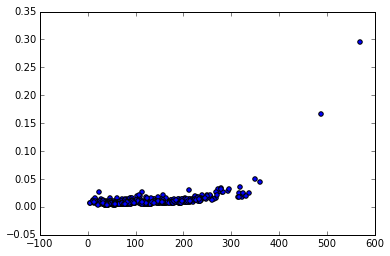

In [99]:
plt.scatter(labels, errors)

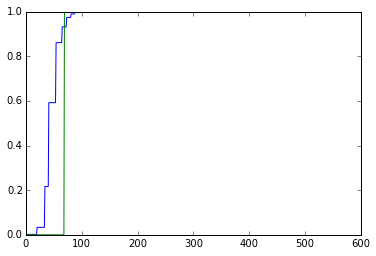

In [34]:
case = 7
plt.plot(cdfs[case])
plt.plot(make_cdf([test_labels[case]])[0])

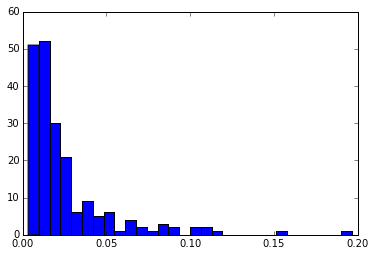

In [37]:
errors = np.mean(np.square(cdfs[:] - make_cdf(test_labels[:])), 1)
counts,scores,_ = plt.hist(errors, bins=30)

In [38]:
counts

array([ 51.,  52.,  30.,  21.,   6.,   9.,   5.,   6.,   1.,   4.,   2.,
         1.,   3.,   2.,   0.,   2.,   2.,   1.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.])

In [39]:
scores[1:]

array([ 0.00964074,  0.01608786,  0.02253498,  0.0289821 ,  0.03542921,
        0.04187633,  0.04832345,  0.05477057,  0.06121769,  0.06766481,
        0.07411193,  0.08055904,  0.08700616,  0.09345328,  0.0999004 ,
        0.10634752,  0.11279464,  0.11924176,  0.12568887,  0.13213599,
        0.13858311,  0.14503023,  0.15147735,  0.15792447,  0.16437159,
        0.1708187 ,  0.17726582,  0.18371294,  0.19016006,  0.19660718])

<Container object of 3 artists>

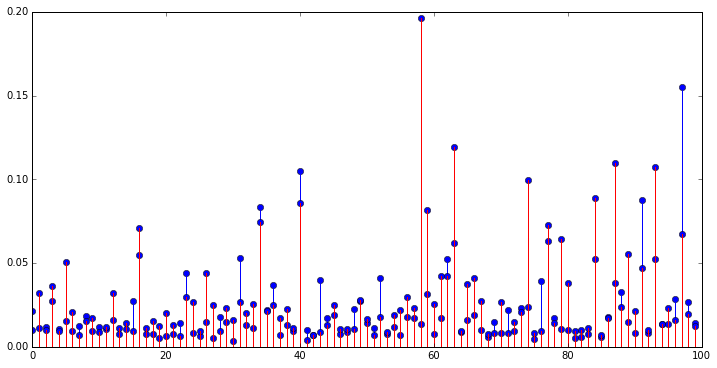

In [40]:
plt.figure(figsize=(12,6))
plt.stem(range(100), errors[1::2])
plt.stem(range(100), errors[::2], linefmt='-r')

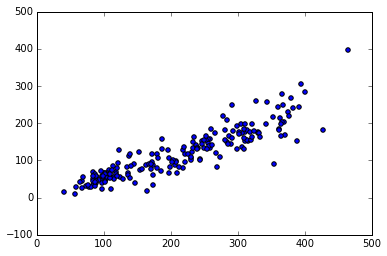

In [76]:
plt.scatter(pests*1.8, test_labels)

In [70]:
(test_labels>250).sum()

7

In [71]:
errors[test_labels>250].mean()

0.10945589699312588

In [49]:
pests = np.sum(np.arange(1,600)*np.diff(cdfs, 1), 1)

In [54]:
d = (test_labels-pests)
(d>0).sum()

107

(array([  1.,   0.,   0.,   1.,   1.,   2.,   2.,   5.,   8.,   9.,  19.,
         33.,  26.,  32.,  21.,  11.,  11.,   3.,   3.,   3.,   3.,   1.,
          2.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-106.02782466,  -97.85607547,  -89.68432627,  -81.51257708,
         -73.34082788,  -65.16907868,  -56.99732949,  -48.82558029,
         -40.6538311 ,  -32.4820819 ,  -24.31033271,  -16.13858351,
          -7.96683432,    0.20491488,    8.37666407,   16.54841327,
          24.72016246,   32.89191166,   41.06366085,   49.23541005,
          57.40715924,   65.57890844,   73.75065763,   81.92240683,
          90.09415602,   98.26590522,  106.43765441,  114.60940361,
         122.7811528 ,  130.952902  ,  139.1246512 ]),
 <a list of 30 Patch objects>)

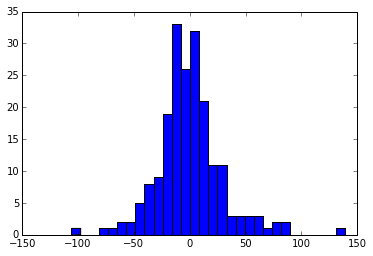

In [56]:
plt.hist(d, bins=30)

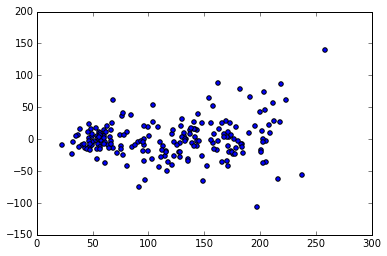

In [50]:
plt.scatter(pests, test_labels-pests)

In [41]:
np.mean(errors[1::2]), np.mean(errors[::2])

(0.021688106497788268, 0.029084798712171418)

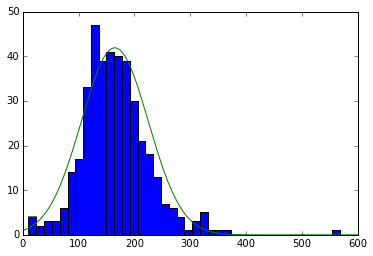

In [80]:
counts,bounds,_ = plt.hist(labels[::2], bins=40)
plt.plot([6300*stats.norm.pdf(i,loc=165,scale=60) for i in range(600)])

In [86]:
counts[18:]

array([ 6.,  4.,  1.,  3.,  5.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [88]:
zip(counts[18:], bounds[18:-1],bounds[19:])

[(6.0, 261.64499999999998, 275.59750000000003),
 (4.0, 275.59750000000003, 289.55000000000001),
 (1.0, 289.55000000000001, 303.5025),
 (3.0, 303.5025, 317.45500000000004),
 (5.0, 317.45500000000004, 331.40750000000003),
 (1.0, 331.40750000000003, 345.36000000000001),
 (1.0, 345.36000000000001, 359.3125),
 (1.0, 359.3125, 373.26499999999999),
 (0.0, 373.26499999999999, 387.21750000000003),
 (0.0, 387.21750000000003, 401.17000000000002),
 (0.0, 401.17000000000002, 415.1225),
 (0.0, 415.1225, 429.07500000000005),
 (0.0, 429.07500000000005, 443.02750000000003),
 (0.0, 443.02750000000003, 456.98000000000002),
 (0.0, 456.98000000000002, 470.9325),
 (0.0, 470.9325, 484.88499999999999),
 (0.0, 484.88499999999999, 498.83750000000003),
 (0.0, 498.83750000000003, 512.78999999999996),
 (0.0, 512.78999999999996, 526.74250000000006),
 (0.0, 526.74250000000006, 540.69500000000005),
 (0.0, 540.69500000000005, 554.64750000000004),
 (1.0, 554.64750000000004, 568.60000000000002)]

In [147]:
augv2_labels = list(all_labels) + list(sorted(all_labels)[-21:-18]*3) #+ list(np.array(list(sorted(all_labels)[-25:-18]))*1.2)

In [185]:
def minibatch(dat, labels, size=500, noise_std=1e-8):
    '''Return random minibatch of shape (size,32,32,3)'''
    num_groups, _, _, num_times, rsize, csize = np.shape(dat)
    case_inds = np.random.randint(0, len(labels), size=size)

    data = np.zeros((size,rsize,csize,9))

    gsize = num_times//3
    time_inds_1 = np.random.randint(0, gsize, size=size)
    time_inds_2 = np.random.randint(gsize, 2*gsize, size=size)
    time_inds_3 = np.random.randint(2*gsize, num_times, size=size)

    data[:,:,:,0] = dat[0][case_inds,np.random.randint(0,2,size), time_inds_1]
    data[:,:,:,1] = dat[1][case_inds,np.random.randint(0,2,size), time_inds_1]
    data[:,:,:,2] = dat[2][case_inds,np.random.randint(0,2,size), time_inds_1]

    data[:,:,:,3] = dat[0][case_inds,np.random.randint(0,2,size), time_inds_2]
    data[:,:,:,4] = dat[1][case_inds,np.random.randint(0,2,size), time_inds_2]
    data[:,:,:,5] = dat[2][case_inds,np.random.randint(0,2,size), time_inds_2]

    data[:,:,:,6] = dat[0][case_inds,np.random.randint(0,2,size), time_inds_3]
    data[:,:,:,7] = dat[1][case_inds,np.random.randint(0,2,size), time_inds_3]
    data[:,:,:,8] = dat[2][case_inds,np.random.randint(0,2,size), time_inds_3]

    y = labels[case_inds] + labels[case_inds]*np.random.normal(0, noise_std, size) # perhaps do this better
    y[y<0] = 0.
    y[y>600] = 600
    #y = labels[case_inds] + np.random.normal(0, noise_std, size)

    return data, y.reshape((-1,1))

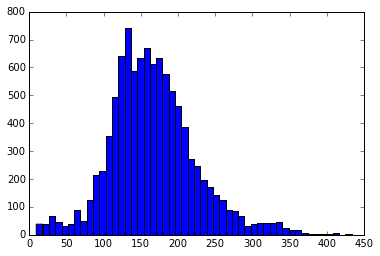

In [201]:
mod = np.array(sorted(all_labels)[:-1])
_, mod_labels = minibatch(train, mod, size=10000, noise_std=0.05)
_,_,_ = plt.hist(mod_labels, bins=50)

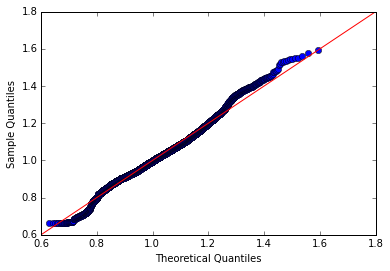

In [202]:
_ = sm.qqplot(mod_labels.flatten(), stats.lognorm, fit=True, line='45')

In [192]:
_, old_new_labels = minibatch(train, all_labels, size=10000, noise_std=0.05)

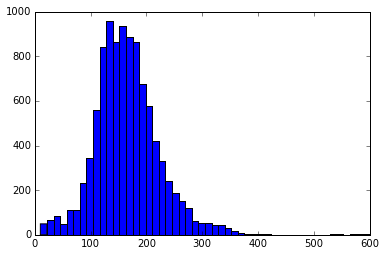

In [193]:
_,_,_ = plt.hist(old_new_labels, bins=50)

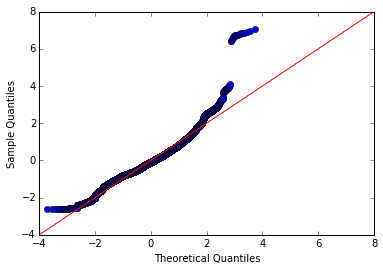

In [191]:
_ = sm.qqplot(old_new_labels.flatten(), stats.norm, fit=True, line='45')

In [170]:
_, new_labels = minibatch(train, all_labels, size=10000, noise_std=0.05)
new_labels.shape

(10000, 1)

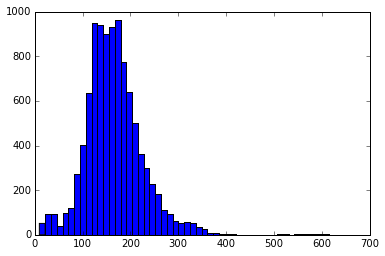

In [171]:
_,_,_ = plt.hist(new_labels, bins=50)

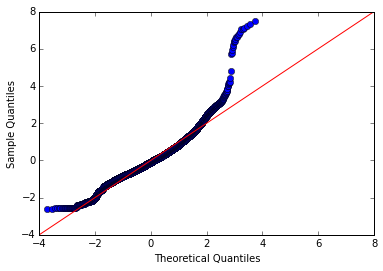

In [172]:
_ = sm.qqplot(new_labels.flatten(), stats.norm, fit=True, line='45')

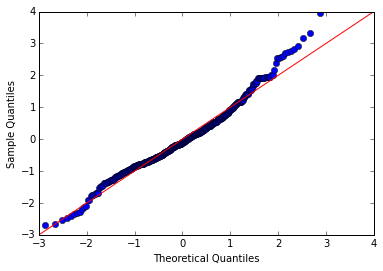

In [148]:
_ = sm.qqplot(np.array((sorted(augv2_labels)[:-1])), stats.norm, fit=True, line='45')

In [119]:
aug_labels = list(all_labels) + [270]*3 + [285]*7 + [291, 295, 292, 300, 305, 310, 320, 350]

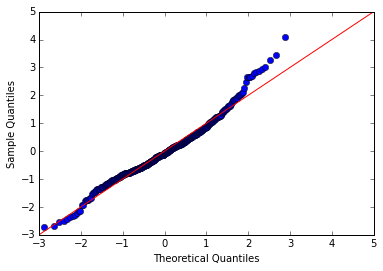

In [120]:
_ = sm.qqplot(np.array((sorted(all_labels)[:-1])), stats.norm, fit=True, line='45')

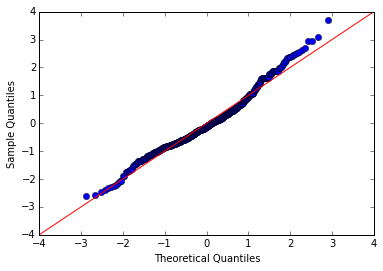

In [121]:
_ = sm.qqplot(np.array((sorted(aug_labels)[:-1])), stats.norm, fit=True, line='45')

In [65]:
all_labels.mean(), all_labels.std()

(165.86679999999998, 59.277250760810425)

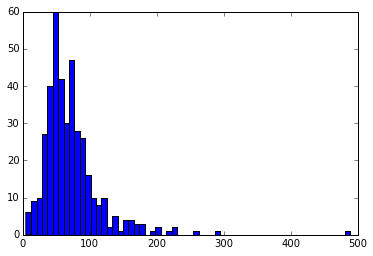

In [22]:
counts,_,_ = plt.hist(labels[1::2], bins=60)

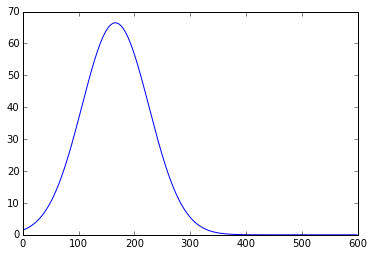

In [53]:
plt.plot([10000*stats.norm.pdf(i,loc=166,scale=60) for i in range(600)])

In [24]:
import statsmodels.api as sm

In [26]:
import scipy.stats as stats

In [43]:
all_labels = np.concatenate((labels[::2], test_labels[::2]),0)

In [ ]:
plt.plot([stats.norm.pdf(loc=166,std=60)()])

In [45]:
sorted(all_labels)[-25:]

[268.30000000000001,
 269.89999999999998,
 272.0,
 272.39999999999998,
 277.60000000000002,
 277.89999999999998,
 279.5,
 279.80000000000001,
 283.60000000000002,
 284.0,
 293.0,
 305.5,
 314.39999999999998,
 315.39999999999998,
 315.80000000000001,
 317.89999999999998,
 323.10000000000002,
 325.30000000000001,
 327.60000000000002,
 331.10000000000002,
 336.19999999999999,
 350.10000000000002,
 359.5,
 397.10000000000002,
 568.60000000000002]

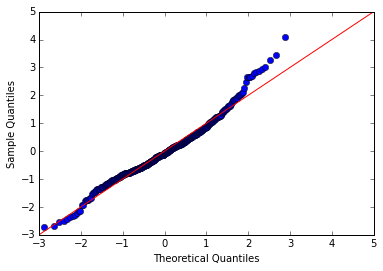

In [47]:
_ = sm.qqplot(np.array(sorted(all_labels)[:-1]), stats.norm, fit=True, line='45')

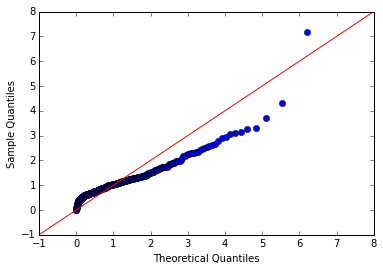

In [40]:
_ = sm.qqplot(np.concatenate((labels[1::2], test_labels[1::2]),0), stats.expon, fit=True, line='45')

In [21]:
labels[1::2].mean(), labels[1::2].std()

(71.872749999999996, 44.465739985268435)

In [17]:
labels[::2].mean(), labels[::2].std()

(166.08000000000001, 60.083747802546412)

In [ ]:
np.sum()

In [19]:
np.sum(counts[:17])/400.

0.92500000000000004

In [16]:
counts[16:24]

array([ 13.,   7.,   6.,   4.,   1.,   3.,   5.,   1.])

# ConvNet - Inception Modules